<a href="https://colab.research.google.com/github/caioeserpa/CaindoNaExplicacao/blob/main/Dominando_SQL_com_Pokemons_Um_guia_necess%C3%A1rio_para_consultas_poderosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎲 Introdução 

# Este é um material criado com intuito de auxiliar o entendimento da linguagem SQL



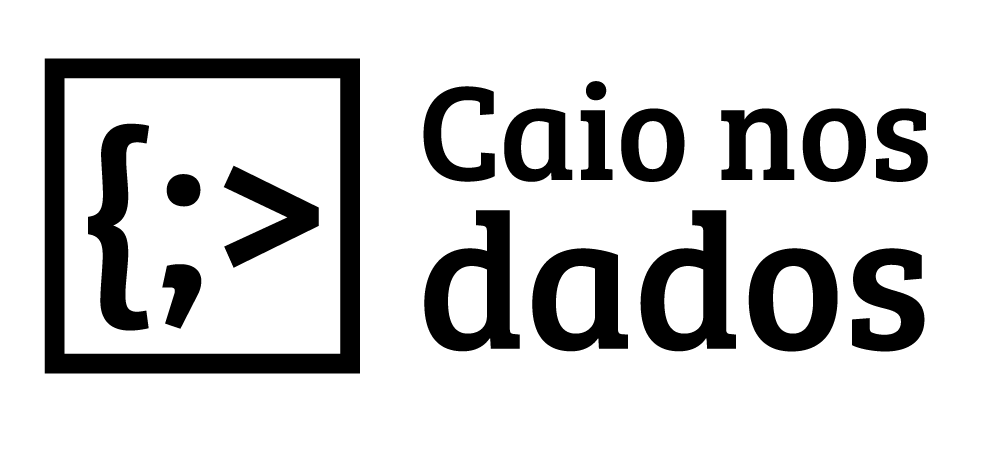


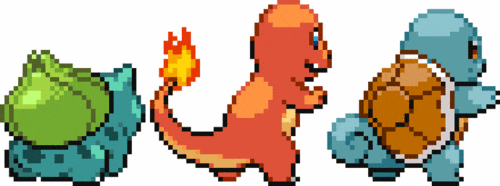

# 👁️Sobre o material apresentado

O material apresentado tem como intuito auxiliar no entendimento da linguagem SQL, para ele, usaremos o dataset do "[Pokemon With Status](https://www.kaggle.com/datasets/abcsds/pokemon)"  e será complementado com dados retirados do: https://pokemondb.net/pokedex/all para a criação de outro dataset

# ⚙️O que é SQL?

🔘**SQL (Structured Query Language)** é uma linguagem de programação utilizada para gerenciar e manipular dados em bancos de dados relacionais. 

Como você já deve ter percebido, SQL muito usado no mundo dos dados. Com ela, acessamos e manipulamos de bancos de dados, o que nos permite criar (a depender do status de usuário), modificar e excluir dados armazenados.

## ⬜Alguns tipos SQL:

🔘**SQL DDL (Data Definition Language):** utilizado para a definição de estruturas de dados, criando tabelas, índices, visões e outros objetos do banco de dados.

<br />

🔘 **SQL DML (Data Manipulation Language):** utilizado para a manipulação dos dados dentro das tabelas do banco de dados, incluindo inserção, atualização e exclusão de dados.

<br />

🔘 **SQL DCL (Data Control Language):** utilizado para a definição de direitos e permissões de acesso aos dados do banco de dados, controlando o acesso de usuários e grupos de usuários.

<br />

🔘 **SQL TCL (Transaction Control Language):** utilizado para o controle de transações realizadas no banco de dados, permitindo que as operações sejam realizadas de forma consistente e segura.

## Carregando bibliotecas

In [1]:
from sqlalchemy import  create_engine
from pathlib import Path
import pandas as pd
import sqlite3

## Criando banco de dados SQLite 3

In [2]:
# Criação do arquivo de banco de dados vazio
Path('pokedb.db').touch()

# Estabelecimento da conexão com o banco de dados
con = sqlite3.connect('pokedb.db')
cursor = con.cursor()

# Criação do engine para o banco de dados
engine = create_engine('sqlite:///pokedb.db')

## Acessando o Dataframe

In [3]:
dataset =  "https://raw.githubusercontent.com/caioeserpa/CaindoNaExplicacao/main/Pokemon%20e%20SQL/base_de_dados/Pokemon.csv" #Aqui você deverá colocar o caminho do drive onde se encontra a sua base de dados
dataset_pokemon = pd.read_csv(dataset)
dataset_pokemon.head(3)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


#Transformando meu dataset em uma tabela para o sql

In [4]:
#Estamos usando a função do pandas (to_sql) para transformarmos nosso dataset em uma tabela direcionando para o
#banco de dados criado, no caso, pokedb criado anteriormente

# Inserção dos dados do dataset na tabela "poketable"
dataset_pokemon.to_sql('poketable', con=engine, if_exists='replace', index=False)



800

# Verificando tabelas no nosso banco de dados

In [5]:
# Consulta para obter a lista de tabelas
query = "SELECT name FROM sqlite_master WHERE type='table'"

# Executar a consulta
cursor.execute(query)

# Recuperar os resultados da consulta
tables = cursor.fetchall()

# Exibir as tabelas encontradas
print("Tabelas no banco de dados:")
for table in tables:
    print(table[0])


Tabelas no banco de dados:
poketable


# ORDEM LÓGICA DO SQL


Para quem não sabe, a maneira que o SQL roda internamente é diferente da maneira pela qual escremos o SQL.

Diferente do famoso SELECT FROM, no SQL, a ordem que ele processa é bastate diferente, olha só.

Ordem lógica de processamento:

<br /> No SQL, a ordem lógica de processamento é a seguinte:

1. **FROM:** Especifica as tabelas e/ou visualizações que serão utilizadas na consulta.

2. **ON:** Define as condições de junção entre as tabelas, caso haja alguma junção.

3. **JOIN:** Realiza a junção das tabelas baseado nas condições definidas no "ON".

4. **WHERE:** Aplica as condições de filtro para selecionar as linhas que atendem aos critérios especificados.

5. **GROUP BY:** Agrupa as linhas resultantes com base nas colunas especificadas, criando grupos.

6. **WITH CUBE or WITH ROLLUP:** Gera subtotais e totais agregados adicionais com base nas colunas agrupadas.

7. **HAVING:** Aplica condições de filtro aos grupos criados pelo "GROUP BY".

8. **SELECT:** Seleciona as colunas que serão exibidas no resultado da consulta.

9. **DISTINCT:** Remove as duplicatas do resultado, exibindo apenas valores únicos.

10. **ORDER BY:** Ordena o resultado com base em uma ou mais colunas especificadas.

11. **TOP:**   Limita o número de linhas retornadas pelo resultado.

##Agora perceba a ordem que escrevemos o SQL:

<br /> 

1. **SELECT**

2. **DISTINCT** 

3. **FROM** 

4. **JOIN**

5. **ON**

6. **WHERE** 

7. **GROUP BY** 

8. **WITH CUBE or WITH ROLLUP** 

9. **HAVING** 

10. **ORDER BY** 

Essa é a ordem típica de escrita das cláusulas SQL. No entanto, é importante ressaltar que nem todas as cláusulas são necessárias em todas as consultas, e você pode ajustar a ordem conforme necessário, dependendo dos requisitos da sua consulta específica.


# COMANDOS SQL

## CREATE

É usado para criar novas tabelas, índices, visões, procedimentos armazenados e outros objetos do banco de dados. 

In [6]:
# Comando para criar a tabela
create_table_query = '''
CREATE TABLE IF NOT EXISTS poketable_2 (
    "#" INTEGER PRIMARY KEY,
    Name TEXT,
    Type1 TEXT,
    Type2 TEXT,
    Total INTEGER,
    HP INTEGER,
    Attack INTEGER,
    Defense INTEGER,
    SpAtk INTEGER,
    SpDef INTEGER,
    Speed INTEGER,
    Generation INTEGER,
    Legendary INTEGER
);
'''

# Executar o comando para criar a tabela
cursor.execute(create_table_query)
con.commit()

In [7]:
# Consulta para obter a lista de tabelas
query = "SELECT name FROM sqlite_master WHERE type='table'"

# Executar a consulta
cursor = con.cursor()
cursor.execute(query)

# Recuperar os resultados da consulta
tables = cursor.fetchall()

# Exibir as tabelas encontradas
print("Tabelas no banco de dados:")
for table in tables:
    print(table[0])


Tabelas no banco de dados:
poketable
poketable_2


## INSERT

utilizado para inserir novos dados em uma tabela.

In [8]:
# Função para inserir um novo registro na tabela
def insert_pokemon(pokemon_data, table):
    query = '''INSERT INTO {} ("#", Name, Type1, Type2, Total, HP, Attack, Defense, SpAtk, SpDef, Speed, Generation, Legendary)
               VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''.format(table)
    cursor.execute(query, pokemon_data)
    con.commit()
    print(f"Registro do pokemon {pokemon_data[1]} foi inserido com sucesso!")
  

# Exemplo de inserção de um novo Pokémon
pokemon = [
    (1010, 'Iron Leaves', 'Grass', 'Psychic', 590, 90, 130, 88, 70, 108, 104, 9, 0),
    (1009, 'Walking Wake', 'Water', 'Dragon', 590, 99, 83, 91, 125, 83, 109, 9, 0),
    (1008, 'Miraidon', 'Eletric', 'Dragon', 670, 100, 85, 100, 135, 115, 135, 9, 1),
    (1007, 'Koraidon', 'Fighting', 'Dragon', 670, 100, 135, 115, 85, 100, 135, 9, 0),
    (1006, 'Iron Valiant', 'Fairy', 'Fighting', 590, 74, 130, 90, 120, 60, 116, 9, 0),
    (1005, 'Roaring Moon', 'Dragon', 'Dark', 590, 105, 139, 71, 55, 101, 119, 9, 1),
    (1004, 'Chi-Yu', 'Dark', 'Fire', 570, 55, 80, 80, 135, 120, 100, 9, 1),
    (1003, 'Ting-Lu', 'Dark', 'Ground', 570, 155, 110, 125, 55, 80, 45, 9, 1),
    (1002, 'Chien-Pao', 'Dark', 'Ice', 570, 80, 120, 80, 90, 65, 135, 9, 1),
    (1001, 'Wo-Chien', 'Dark', 'Grass', 570, 85, 85, 100, 95, 135, 70, 9, 1),
    (1000, 'Gholdengo', 'Steel', 'Ghost', 550, 87, 60, 95, 133, 91, 84, 9, 0),
    (999, 'Gimmighoul', 'Ghost', None, 300, 45, 30, 25, 75, 45, 80, 9, 0)
]

table = 'poketable_2'

for p in pokemon:
  insert_pokemon(p, table)


Registro do pokemon Iron Leaves foi inserido com sucesso!
Registro do pokemon Walking Wake foi inserido com sucesso!
Registro do pokemon Miraidon foi inserido com sucesso!
Registro do pokemon Koraidon foi inserido com sucesso!
Registro do pokemon Iron Valiant foi inserido com sucesso!
Registro do pokemon Roaring Moon foi inserido com sucesso!
Registro do pokemon Chi-Yu foi inserido com sucesso!
Registro do pokemon Ting-Lu foi inserido com sucesso!
Registro do pokemon Chien-Pao foi inserido com sucesso!
Registro do pokemon Wo-Chien foi inserido com sucesso!
Registro do pokemon Gholdengo foi inserido com sucesso!
Registro do pokemon Gimmighoul foi inserido com sucesso!


In [9]:
#Verificando registro
query = 'SELECT * FROM poketable_2'
poke_select = pd.read_sql_query(query, con).set_index('#')
poke_select.head(3)

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
#,,,,,,,,,,,,
999,Gimmighoul,Ghost,None,300,45,30,25,75,45,80,9,0
1000,Gholdengo,Steel,Ghost,550,87,60,95,133,91,84,9,0
1001,Wo-Chien,Dark,Grass,570,85,85,100,95,135,70,9,1


## DELETE

É usado para excluir um ou mais registros de uma tabela.


**PELO AMOR DEUS, DEVS DO MEU CORAÇÃO, NÃO ME INVENTE DE DAR UM `DELETE` SEM `WHERE`**

In [10]:
query = "DELETE FROM poketable_2 WHERE Name = 'Gimmighoul'"
cursor.execute(query)
con.commit()

## SELECT

É usada para selecionar as colunas que desejamos exibir no resultado da consulta. Aqui, especificamos as colunas que queremos que sejam retornadas.

In [11]:
# Exemplo de consulta de dados usando SQL
cursor.execute('SELECT * FROM poketable')
#O comando execute, assim como condiz o seu nome, executa uma instrução. 
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'Bulbasaur', 'Grass', 'Poison', 318, 45, 49, 49, 65, 65, 45, 1, 0)
(2, 'Ivysaur', 'Grass', 'Poison', 405, 60, 62, 63, 80, 80, 60, 1, 0)
(3, 'Venusaur', 'Grass', 'Poison', 525, 80, 82, 83, 100, 100, 80, 1, 0)
(3, 'VenusaurMega Venusaur', 'Grass', 'Poison', 625, 80, 100, 123, 122, 120, 80, 1, 0)
(4, 'Charmander', 'Fire', None, 309, 39, 52, 43, 60, 50, 65, 1, 0)
(5, 'Charmeleon', 'Fire', None, 405, 58, 64, 58, 80, 65, 80, 1, 0)
(6, 'Charizard', 'Fire', 'Flying', 534, 78, 84, 78, 109, 85, 100, 1, 0)
(6, 'CharizardMega Charizard X', 'Fire', 'Dragon', 634, 78, 130, 111, 130, 85, 100, 1, 0)
(6, 'CharizardMega Charizard Y', 'Fire', 'Flying', 634, 78, 104, 78, 159, 115, 100, 1, 0)
(7, 'Squirtle', 'Water', None, 314, 44, 48, 65, 50, 64, 43, 1, 0)
(8, 'Wartortle', 'Water', None, 405, 59, 63, 80, 65, 80, 58, 1, 0)
(9, 'Blastoise', 'Water', None, 530, 79, 83, 100, 85, 105, 78, 1, 0)
(9, 'BlastoiseMega Blastoise', 'Water', None, 630, 79, 103, 120, 135, 115, 78, 1, 0)
(10, 'Caterpie', 'Bug', None

In [12]:
#Usando pandas
query = 'SELECT * FROM poketable'
poke_select = pd.read_sql_query(query, con).set_index('#')
poke_select.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0


In [13]:
query = 'SELECT * FROM poketable_2'
poke_select = pd.read_sql_query(query, con).set_index('#')
poke_select.head(3)

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
#,,,,,,,,,,,,
1000,Gholdengo,Steel,Ghost,550,87,60,95,133,91,84,9,0
1001,Wo-Chien,Dark,Grass,570,85,85,100,95,135,70,9,1
1002,Chien-Pao,Dark,Ice,570,80,120,80,90,65,135,9,1


o uso do fetchall() pode não ser adequado para grandes conjuntos de resultados, pois todos os resultados são recuperados e armazenados em memória. Para consultas que retornam um grande volume de dados, pode ser mais eficiente usar métodos como fetchone() para recuperar uma linha de cada vez ou fetchmany() para recuperar um número específico de linhas.

## DISTINCT

Usada para remover duplicatas do resultado da consulta, exibindo apenas valores únicos para as colunas selecionadas. Ela vem logo após a cláusula `SELECT`, se necessário.

In [14]:
#Usando pandas
query = 'SELECT DISTINCT "Type 1" FROM poketable'
poke_distinct = pd.read_sql_query(query, con)
poke_distinct.head(3)

,Type 1
0,Grass
1,Fire
2,Water


## FROM

Usamos para especificar as tabelas e/ou visualizações das quais estamos recuperando informações. Aqui, identificamos as fontes de dados que serão usadas na consulta.

In [15]:
#Iremos escolher a tabela de "poketable" por conter mais registros
query = 'SELECT * FROM poketable'
poke_select = pd.read_sql_query(query, con).set_index('#')
poke_select.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0


## WHERE

É utilizada para aplicar filtros às linhas resultantes, com base em determinadas condições. Aqui, adicionamos restrições aos valores das colunas para limitar o conjunto de resultados.

In [16]:
# Selecionando todos os Pokémon da primeira geração
query = "SELECT * FROM poketable WHERE Generation = 1"
cursor.execute(query)
rows = cursor.fetchall()

# Imprimindo os resultados
for row in rows:
    print(row)

(1, 'Bulbasaur', 'Grass', 'Poison', 318, 45, 49, 49, 65, 65, 45, 1, 0)
(2, 'Ivysaur', 'Grass', 'Poison', 405, 60, 62, 63, 80, 80, 60, 1, 0)
(3, 'Venusaur', 'Grass', 'Poison', 525, 80, 82, 83, 100, 100, 80, 1, 0)
(3, 'VenusaurMega Venusaur', 'Grass', 'Poison', 625, 80, 100, 123, 122, 120, 80, 1, 0)
(4, 'Charmander', 'Fire', None, 309, 39, 52, 43, 60, 50, 65, 1, 0)
(5, 'Charmeleon', 'Fire', None, 405, 58, 64, 58, 80, 65, 80, 1, 0)
(6, 'Charizard', 'Fire', 'Flying', 534, 78, 84, 78, 109, 85, 100, 1, 0)
(6, 'CharizardMega Charizard X', 'Fire', 'Dragon', 634, 78, 130, 111, 130, 85, 100, 1, 0)
(6, 'CharizardMega Charizard Y', 'Fire', 'Flying', 634, 78, 104, 78, 159, 115, 100, 1, 0)
(7, 'Squirtle', 'Water', None, 314, 44, 48, 65, 50, 64, 43, 1, 0)
(8, 'Wartortle', 'Water', None, 405, 59, 63, 80, 65, 80, 58, 1, 0)
(9, 'Blastoise', 'Water', None, 530, 79, 83, 100, 85, 105, 78, 1, 0)
(9, 'BlastoiseMega Blastoise', 'Water', None, 630, 79, 103, 120, 135, 115, 78, 1, 0)
(10, 'Caterpie', 'Bug', None

In [17]:
query = 'SELECT *  FROM poketable WHERE Legendary = 1'
poke_where = pd.read_sql_query(query, con).set_index('#')
poke_where.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,1
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,1
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,1


## GROUP BY

Se desejarmos agrupar as linhas resultantes com base em uma ou mais colunas, usamos a cláusula `GROUP BY`. Ela cria grupos de linhas com valores semelhantes nas colunas especificadas.

In [18]:
# Contando o número de Pokémon por geração
query = "SELECT Generation, COUNT(*) FROM poketable GROUP BY Generation"
cursor.execute(query)
rows = cursor.fetchall()

# Imprimindo os resultados
for row in rows:
    print("Geração:", row[0])
    print("Total de Pokémon:", row[1])
    print()

Geração: 1
Total de Pokémon: 166

Geração: 2
Total de Pokémon: 106

Geração: 3
Total de Pokémon: 160

Geração: 4
Total de Pokémon: 121

Geração: 5
Total de Pokémon: 165

Geração: 6
Total de Pokémon: 82



In [19]:
# Definindo a consulta SQL
query = '''SELECT Generation, COUNT(*) AS Qtd_Pokemons FROM poketable GROUP BY Generation'''

# Executando a consulta e armazenando o resultado em um DataFrame
poke_group_by = pd.read_sql_query(query, con).set_index('Generation')

# Imprimindo o resultado
poke_group_by

,Qtd_Pokemons
Generation,
1,166
2,106
3,160
4,121
5,165
6,82


## ORDER BY

A cláusula `ORDER BY` é usada para ordenar o resultado com base em uma ou mais colunas. Aqui, especificamos a ordenação ascendente ou descendente para cada coluna.


In [20]:
# Definindo a consulta SQL
query = '''SELECT Generation, COUNT(*) AS Qtd_Pokemons FROM poketable GROUP BY Generation ORDER BY Qtd_Pokemons'''


# Executando a consulta e armazenando o resultado em um DataFrame
poke_order_by = pd.read_sql_query(query, con).set_index('Generation')

# Imprimindo o resultado
poke_order_by

,Qtd_Pokemons
Generation,
6,82
2,106
4,121
3,160
5,165
1,166


Você pode adicionar a palavra-chave **ASC** (ascendente) ou **DESC** (descendente) após cada coluna para definir a direção da ordenação. Por padrão, se nenhuma direção for especificada, a ordenação será ascendente.

**ASC**: Ordena em ordem ascendente (do menor para o maior valor).
<br />

**DESC**: Ordena em ordem descendente (do maior para o menor valor).

## MIN

O comando MIN no SQL é usado para retornar o valor mínimo de uma coluna em uma consulta. 

In [21]:
query = 'SELECT "#", Name, MIN(Attack) as Attack_Min, Defense, Generation FROM poketable'
poke_min = pd.read_sql_query(query, con).set_index('#')
poke_min.head(3)

,Name,Attack_Min,Defense,Generation
#,,,,
113,Chansey,5,5,1


## MAX

O comando MAX no SQL é usado para retornar o valor mínimo de uma coluna em uma consulta. 

In [22]:
query = 'SELECT "#", Name, MAX(Attack) as Attack_Max, Defense, Generation FROM poketable'
poke_max = pd.read_sql_query(query, con).set_index('#')
poke_max.head(3)

,Name,Attack_Max,Defense,Generation
#,,,,
150,MewtwoMega Mewtwo X,190,100,1


## COUNT

O comando COUNT no SQL é usado para contar valores de uma coluna em uma consulta. 

In [23]:
query = 'SELECT COUNT(Name) AS "Qtd de Pokemons Cad." FROM poketable'
poke_count = pd.read_sql_query(query, con)
poke_count.head(3)

,Qtd de Pokemons Cad.
0,800


## LIMIT

In [24]:
# Consulta SQL com o comando LIMIT para retornar as 5 primeiras linhas
query = 'SELECT * FROM poketable LIMIT 5'

# Executar a consulta e obter o resultado em um DataFrame do pandas
poke_limit = pd.read_sql_query(query, con).set_index('#')

# Exibir o resultado
poke_limit

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


## HAVING

A cláusula `HAVING` é usada para filtrar os grupos criados pelo `GROUP BY` com base em condições de agregação. Ela permite descartar grupos que não atendem aos critérios especificados.

In [25]:

# Consulta SQL com o comando HAVING
query = """SELECT "Type 1", COUNT(*) AS Count
           FROM poketable
           GROUP BY "Type 1"
           HAVING Count > 50 """

# Executar a consulta e obter o resultado em um DataFrame do pandas
df = pd.read_sql_query(query, con)

# Exibir o resultado
print(df)


    Type 1  Count
0      Bug     69
1     Fire     52
2    Grass     70
3   Normal     98
4  Psychic     57
5    Water    112


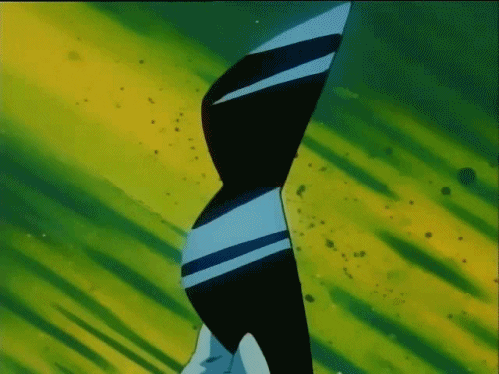

# JOINS E SEUS TIPOS

Se houver necessidade de combinar tabelas, utilizamos a cláusula `JOIN` para realizar as junções. Essa cláusula permite que você combine linhas de diferentes tabelas com base nas condições especificadas.





























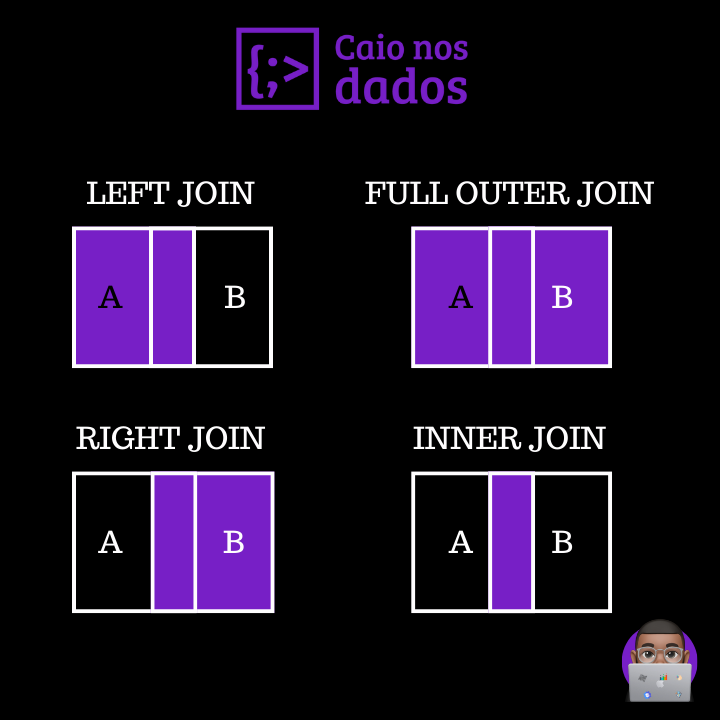

## ON
Usada em conjunto com a cláusula `JOIN` para definir as condições de junção. Aqui, especificamos as colunas que devem ser iguais entre as tabelas envolvidas na junção.

###INNER JOIN (ou simplesmente JOIN):
 Retorna apenas os registros que possuem correspondência nas duas tabelas sendo unidas, com base na condição de junção especificada. Ou seja, apenas os registros que atendem à condição são retornados.


In [26]:
# Exemplo de INNER JOIN
query = """SELECT *
           FROM poketable
           """

cursor.execute(query)
result = cursor.fetchall()
for row in result:
    print(row)

(1, 'Bulbasaur', 'Grass', 'Poison', 318, 45, 49, 49, 65, 65, 45, 1, 0)
(2, 'Ivysaur', 'Grass', 'Poison', 405, 60, 62, 63, 80, 80, 60, 1, 0)
(3, 'Venusaur', 'Grass', 'Poison', 525, 80, 82, 83, 100, 100, 80, 1, 0)
(3, 'VenusaurMega Venusaur', 'Grass', 'Poison', 625, 80, 100, 123, 122, 120, 80, 1, 0)
(4, 'Charmander', 'Fire', None, 309, 39, 52, 43, 60, 50, 65, 1, 0)
(5, 'Charmeleon', 'Fire', None, 405, 58, 64, 58, 80, 65, 80, 1, 0)
(6, 'Charizard', 'Fire', 'Flying', 534, 78, 84, 78, 109, 85, 100, 1, 0)
(6, 'CharizardMega Charizard X', 'Fire', 'Dragon', 634, 78, 130, 111, 130, 85, 100, 1, 0)
(6, 'CharizardMega Charizard Y', 'Fire', 'Flying', 634, 78, 104, 78, 159, 115, 100, 1, 0)
(7, 'Squirtle', 'Water', None, 314, 44, 48, 65, 50, 64, 43, 1, 0)
(8, 'Wartortle', 'Water', None, 405, 59, 63, 80, 65, 80, 58, 1, 0)
(9, 'Blastoise', 'Water', None, 530, 79, 83, 100, 85, 105, 78, 1, 0)
(9, 'BlastoiseMega Blastoise', 'Water', None, 630, 79, 103, 120, 135, 115, 78, 1, 0)
(10, 'Caterpie', 'Bug', None

In [27]:
# Exemplo de INNER JOIN
query = """SELECT poketable.Name, poketable."Type 1", poketable_2.Name, poketable_2."Type1"
           FROM poketable
           INNER JOIN poketable_2 ON poketable."Type 1" = poketable_2."Type1"
           """

cursor.execute(query)
result = cursor.fetchall()
for row in result:
    print(row)

('Bulbasaur', 'Grass', 'Iron Leaves', 'Grass')
('Ivysaur', 'Grass', 'Iron Leaves', 'Grass')
('Venusaur', 'Grass', 'Iron Leaves', 'Grass')
('VenusaurMega Venusaur', 'Grass', 'Iron Leaves', 'Grass')
('Squirtle', 'Water', 'Walking Wake', 'Water')
('Wartortle', 'Water', 'Walking Wake', 'Water')
('Blastoise', 'Water', 'Walking Wake', 'Water')
('BlastoiseMega Blastoise', 'Water', 'Walking Wake', 'Water')
('Clefairy', 'Fairy', 'Iron Valiant', 'Fairy')
('Clefable', 'Fairy', 'Iron Valiant', 'Fairy')
('Oddish', 'Grass', 'Iron Leaves', 'Grass')
('Gloom', 'Grass', 'Iron Leaves', 'Grass')
('Vileplume', 'Grass', 'Iron Leaves', 'Grass')
('Psyduck', 'Water', 'Walking Wake', 'Water')
('Golduck', 'Water', 'Walking Wake', 'Water')
('Mankey', 'Fighting', 'Koraidon', 'Fighting')
('Primeape', 'Fighting', 'Koraidon', 'Fighting')
('Poliwag', 'Water', 'Walking Wake', 'Water')
('Poliwhirl', 'Water', 'Walking Wake', 'Water')
('Poliwrath', 'Water', 'Walking Wake', 'Water')
('Machop', 'Fighting', 'Koraidon', 'Figh

In [28]:
query = """SELECT poketable.Name, poketable."Type 1", poketable_2.Name, poketable_2."Type1"
           FROM poketable
           INNER JOIN poketable_2 ON poketable."Type 1" = poketable_2."Type1"
           """

pokemon_inner_joins = pd.read_sql_query(query, con)
pokemon_inner_joins.head(3)

,Name,Type 1,Name,Type1
0,Bulbasaur,Grass,Iron Leaves,Grass
1,Ivysaur,Grass,Iron Leaves,Grass
2,Venusaur,Grass,Iron Leaves,Grass


###LEFT JOIN (ou LEFT OUTER JOIN):
 Retorna todos os registros da tabela à esquerda (tabela da esquerda na cláusula JOIN) e os registros correspondentes da tabela à direita (tabela da direita na cláusula JOIN). Se não houver correspondência na tabela da direita, os campos da tabela da direita serão preenchidos com valores nulos.



In [29]:
# Criação da tabela PokemonEvolutions
query_create_table = '''
CREATE TABLE PokemonEvolutions (
  Pokemon TEXT,
  Evolucao1 TEXT,
  Evolucao2 TEXT
);
'''
con.execute(query_create_table)

# Função para inserir um novo registro na tabela
def insert_pokemon_evolutions(pokemon_data, table):
    query = '''INSERT INTO {} (Pokemon, Evolucao1, Evolucao2)
               VALUES (?, ?, ?)'''.format(table)
    cursor.execute(query, pokemon_data)
    con.commit()
    print(f"Registro do pokemon {pokemon_data[0]} foi inserido com sucesso!")
  


table = 'PokemonEvolutions'


# Lista de dados para inserção
pokemon_data = [
    ('Bulbasaur', 'Ivysaur', 'Venusaur'),
    ('Charmander', 'Charmeleon', 'Charizard'),
    ('Squirtle', 'Wartortle', 'Blastoise'),
    ('Pikachu', 'Raichu', None),
    ('Eevee', 'Vaporeon', 'Jolteon'),
    ('Caterpie', 'Metapod', 'Butterfree'),
    ('Weedle', 'Kakuna', 'Beedrill'),
    ('Pidgey', 'Pidgeotto', 'Pidgeot'),
    ('Rattata', 'Raticate', None),
    ('Spearow', 'Fearow', None),
    ('Ekans', 'Arbok', None),
    ('Sandshrew', 'Sandslash', None),
    ('Nidoran♀', 'Nidorina', 'Nidoqueen'),
    ('Nidoran♂', 'Nidorino', 'Nidoking'),
    ('Clefairy', 'Clefable', None)
]

for p in pokemon_data:
  insert_pokemon_evolutions(p, table)

Registro do pokemon Bulbasaur foi inserido com sucesso!
Registro do pokemon Charmander foi inserido com sucesso!
Registro do pokemon Squirtle foi inserido com sucesso!
Registro do pokemon Pikachu foi inserido com sucesso!
Registro do pokemon Eevee foi inserido com sucesso!
Registro do pokemon Caterpie foi inserido com sucesso!
Registro do pokemon Weedle foi inserido com sucesso!
Registro do pokemon Pidgey foi inserido com sucesso!
Registro do pokemon Rattata foi inserido com sucesso!
Registro do pokemon Spearow foi inserido com sucesso!
Registro do pokemon Ekans foi inserido com sucesso!
Registro do pokemon Sandshrew foi inserido com sucesso!
Registro do pokemon Nidoran♀ foi inserido com sucesso!
Registro do pokemon Nidoran♂ foi inserido com sucesso!
Registro do pokemon Clefairy foi inserido com sucesso!


In [30]:
# Exemplo de LEFT JOIN
query = """SELECT poketable.Name, PokemonEvolutions.Evolucao1, PokemonEvolutions.Evolucao2
           FROM poketable
           LEFT JOIN PokemonEvolutions ON poketable.Name = PokemonEvolutions.Pokemon"""

cursor.execute(query)
result = cursor.fetchall()
for row in result:
    print(row)

('Bulbasaur', 'Ivysaur', 'Venusaur')
('Ivysaur', None, None)
('Venusaur', None, None)
('VenusaurMega Venusaur', None, None)
('Charmander', 'Charmeleon', 'Charizard')
('Charmeleon', None, None)
('Charizard', None, None)
('CharizardMega Charizard X', None, None)
('CharizardMega Charizard Y', None, None)
('Squirtle', 'Wartortle', 'Blastoise')
('Wartortle', None, None)
('Blastoise', None, None)
('BlastoiseMega Blastoise', None, None)
('Caterpie', 'Metapod', 'Butterfree')
('Metapod', None, None)
('Butterfree', None, None)
('Weedle', 'Kakuna', 'Beedrill')
('Kakuna', None, None)
('Beedrill', None, None)
('BeedrillMega Beedrill', None, None)
('Pidgey', 'Pidgeotto', 'Pidgeot')
('Pidgeotto', None, None)
('Pidgeot', None, None)
('PidgeotMega Pidgeot', None, None)
('Rattata', 'Raticate', None)
('Raticate', None, None)
('Spearow', 'Fearow', None)
('Fearow', None, None)
('Ekans', 'Arbok', None)
('Arbok', None, None)
('Pikachu', 'Raichu', None)
('Raichu', None, None)
('Sandshrew', 'Sandslash', None)


Se você perceber, no código acima, retorna em modo de pokedex, como uma lista de valores abaixo do outro, entretanto, isso faz com que nem todas as informações sejam carregadas por falta de dados na tabela de evolução.

In [31]:
#Este código filtra os valores vazios, logo, nos trará uma informação mais coerente com o que desejamos ver
query = """SELECT poketable.Name, PokemonEvolutions.Evolucao1, PokemonEvolutions.Evolucao2
           FROM poketable
           LEFT JOIN PokemonEvolutions ON poketable.Name = PokemonEvolutions.Pokemon
           WHERE Evolucao1 IS NOT NULL"""

pokemon_left_join = pd.read_sql_query(query, con)
pokemon_left_join.head(3)

,Name,Evolucao1,Evolucao2
0,Bulbasaur,Ivysaur,Venusaur
1,Charmander,Charmeleon,Charizard
2,Squirtle,Wartortle,Blastoise


###RIGHT JOIN (ou RIGHT OUTER JOIN): **<font color=red>(MENSÃO HONROSA, SQLITE3 NÃO SUPORTA RIGHT JOIN)<font/>**
É o oposto do LEFT JOIN. Retorna todos os registros da tabela à direita e os registros correspondentes da tabela à esquerda. Se não houver correspondência na tabela da esquerda, os campos da tabela da esquerda serão preenchidos com valores nulos.


In [32]:
# # Exemplo de RIGHT JOIN
# query = """SELECT PokemonEvolutions.Pokemon, poketable.Generation
#            FROM PokemonEvolutions
#            RIGHT JOIN poketable ON PokemonEvolutions.Pokemon = poketable.Name"""

# cursor.execute(query)
# result = cursor.fetchall()
# for row in result:
#     print(row)

In [33]:
# query = """SELECT PokemonEvolutions.Pokemon, poketable.Generation
#            FROM PokemonEvolutions
#            RIGHT JOIN poketable ON PokemonEvolutions.Pokemon = poketable.Name"""

# pokemon_right_join = pd.read_sql_query(query, con)
# pokemon_right_join.head(3)


###FULL JOIN (ou FULL OUTER JOIN):  **<font color=red>(MENSÃO HONROSA, SQLITE3 NÃO SUPORTA FULL JOIN)<font/>**
Retorna todos os registros de ambas as tabelas, combinando registros quando há correspondência e preenchendo com valores nulos quando não há correspondência.



In [34]:
# # Executando o FULL JOIN entre as tabelas poketable e poketable_2
# query = '''SELECT *
#            FROM poketable
#            FULL JOIN poketable_2 ON poketable."#" = poketable_2."#"'''

# cursor.execute(query)
# result = cursor.fetchall()

# # Imprimindo o resultado
# for row in result:
#     print(row)


In [35]:
# query = """SELECT PokemonEvolution.Pokemon, poketable.Generation
#            FROM PokemonEvolution
#            RIGHT JOIN poketable ON PokemonEvolution.Pokemon = poketable.Name
#            WHERE "Type 1" = "GRASS"
#            """

# pokemon_full_join = pd.read_sql_query(query, con)
# pokemon_full_join.head(3)

###CROSS JOIN (ou CARTESIAN JOIN):
 Realiza a combinação de todos os registros da tabela à esquerda com todos os registros da tabela à direita, resultando em um produto cartesiano. Não requer uma condição de junção.

In [36]:
# Exemplo de CROSS JOIN
query = """SELECT poketable.Name, poketable_2.Name
           FROM poketable
           CROSS JOIN poketable_2"""

cursor.execute(query)
result = cursor.fetchall()
for row in result:
    print(row)

A saída de streaming foi truncada nas últimas 5000 linhas.
('Gulpin', 'Roaring Moon')
('Gulpin', 'Iron Valiant')
('Gulpin', 'Koraidon')
('Gulpin', 'Miraidon')
('Gulpin', 'Walking Wake')
('Gulpin', 'Iron Leaves')
('Swalot', 'Gholdengo')
('Swalot', 'Wo-Chien')
('Swalot', 'Chien-Pao')
('Swalot', 'Ting-Lu')
('Swalot', 'Chi-Yu')
('Swalot', 'Roaring Moon')
('Swalot', 'Iron Valiant')
('Swalot', 'Koraidon')
('Swalot', 'Miraidon')
('Swalot', 'Walking Wake')
('Swalot', 'Iron Leaves')
('Carvanha', 'Gholdengo')
('Carvanha', 'Wo-Chien')
('Carvanha', 'Chien-Pao')
('Carvanha', 'Ting-Lu')
('Carvanha', 'Chi-Yu')
('Carvanha', 'Roaring Moon')
('Carvanha', 'Iron Valiant')
('Carvanha', 'Koraidon')
('Carvanha', 'Miraidon')
('Carvanha', 'Walking Wake')
('Carvanha', 'Iron Leaves')
('Sharpedo', 'Gholdengo')
('Sharpedo', 'Wo-Chien')
('Sharpedo', 'Chien-Pao')
('Sharpedo', 'Ting-Lu')
('Sharpedo', 'Chi-Yu')
('Sharpedo', 'Roaring Moon')
('Sharpedo', 'Iron Valiant')
('Sharpedo', 'Koraidon')
('Sharpedo', 'Miraidon')


In [37]:
pokemon_cross_join = pd.read_sql_query(query, con)
pokemon_cross_join.head(3)

,Name,Name
0,Bulbasaur,Gholdengo
1,Bulbasaur,Wo-Chien
2,Bulbasaur,Chien-Pao


# UNION

**O comando UNION no SQL é usado para combinar o resultado de duas ou mais consultas em uma única tabela de resultados. Ele permite juntar os resultados de consultas que possuem a mesma estrutura de colunas em uma única lista, eliminando duplicatas.**

O UNION opera verticalmente, combinando as linhas de resultado das consultas em uma única tabela de resultado. Cada consulta dentro do UNION deve ter o mesmo número de colunas e as colunas correspondentes devem ter tipos de dados compatíveis.

<br />

Existem algumas características importantes do UNION:

* O UNION seleciona apenas linhas distintas (diferentes) das tabelas de resultado.
* O UNION implica uma operação de ordenação implícita para eliminar as duplicatas.
* Os nomes das colunas na tabela de resultado são determinados pelos nomes das colunas na primeira consulta do UNION.

In [38]:

# Exemplo de uso do comando UNION
query = """SELECT Name, "Type 1"
           FROM poketable
           WHERE Generation = 1
           UNION
           SELECT Name, "Type 2"
           FROM poketable
           WHERE Generation = 1"""

cursor.execute(query)
result = cursor.fetchall()
for row in result:
    print(row)

('Abra', None)
('Abra', 'Psychic')
('Aerodactyl', 'Flying')
('Aerodactyl', 'Rock')
('AerodactylMega Aerodactyl', 'Flying')
('AerodactylMega Aerodactyl', 'Rock')
('Alakazam', None)
('Alakazam', 'Psychic')
('AlakazamMega Alakazam', None)
('AlakazamMega Alakazam', 'Psychic')
('Arbok', None)
('Arbok', 'Poison')
('Arcanine', None)
('Arcanine', 'Fire')
('Articuno', 'Flying')
('Articuno', 'Ice')
('Beedrill', 'Bug')
('Beedrill', 'Poison')
('BeedrillMega Beedrill', 'Bug')
('BeedrillMega Beedrill', 'Poison')
('Bellsprout', 'Grass')
('Bellsprout', 'Poison')
('Blastoise', None)
('Blastoise', 'Water')
('BlastoiseMega Blastoise', None)
('BlastoiseMega Blastoise', 'Water')
('Bulbasaur', 'Grass')
('Bulbasaur', 'Poison')
('Butterfree', 'Bug')
('Butterfree', 'Flying')
('Caterpie', None)
('Caterpie', 'Bug')
('Chansey', None)
('Chansey', 'Normal')
('Charizard', 'Fire')
('Charizard', 'Flying')
('CharizardMega Charizard X', 'Dragon')
('CharizardMega Charizard X', 'Fire')
('CharizardMega Charizard Y', 'Fire'

In [39]:
query = """SELECT Name, "Type 1"
           FROM poketable
           WHERE Generation = 1
           UNION
           SELECT Name, "Type 2"
           FROM poketable_2
           WHERE Generation = 1"""

poke_union = pd.read_sql_query(query, con)
poke_union.head(3)

,Name,Type 1
0,Abra,Psychic
1,Aerodactyl,Rock
2,AerodactylMega Aerodactyl,Rock


#SUB SELECTS

In [40]:
query = '''
SELECT *
FROM poketable p
WHERE Attack = (
    SELECT MAX(Attack)
    FROM poketable
    WHERE Generation = p.Generation
)
'''

#Neste exemplo, o subselect é usado para encontrar o valor máximo de ataque (Attack) para cada geração.
#Em seguida, o SELECT principal seleciona todos os campos (*) dos Pokémon cujo valor de ataque é igual ao
#valor máximo encontrado no subselect, relacionando a condição com a geração do Pokémon na cláusula WHERE.
poke_subselect = pd.read_sql_query(query, con)
poke_subselect.head(3)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,1
1,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,0
2,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,1


# Fechando Conexão com o Banco de Dados



In [41]:
con.close()

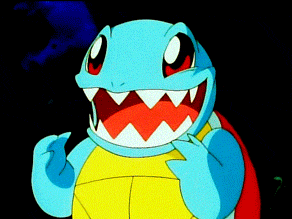

# **Agradecimentos**

Gostaria de agradescer à todos pelo apoio na criação do conteúdo, em especial à Junior Fazzio e Felipe Bandeira por sempre me apoiarem, revisarem os conteúdos e acrescentarem com sugestões de melhoria.

# **Me conheça mais nas outas redes!**

**Instagram:** [@caionosdados](!https://www.instagram.com/caionosdados/)

**Linkedin:** https://www.linkedin.com/in/caioeserpa/


**Github:** https://github.com/caioeserpa/

**Site:** https://www.caionosdados.com.br/